# Implementation and Comparison of AES & DES Encryption

Objectives:

* ✔ Understand DES and AES encryption principles.
* ✔ Implement DES and AES in Python.
* ✔ Compare their performance and security.
* ✔ Perform hands-on tasks to reinforce learning.







Introduction to AES & DES

🔹 Data Encryption Standard (DES)
* Symmetric block cipher (same key for encryption & decryption).
* Uses 56-bit key and encrypts 64-bit blocks.
* Feistel Network structure, 16 rounds.
* Weakness: Small key size → vulnerable to brute-force attacks.

🔹 Advanced Encryption Standard (AES)
* Symmetric block cipher (modern replacement for DES).
* Uses 128, 192, or 256-bit keys and encrypts 128-bit blocks.
* Substitution-Permutation Network (SPN) structure, 10-14 rounds.
* More secure & faster than DE

Comparison:
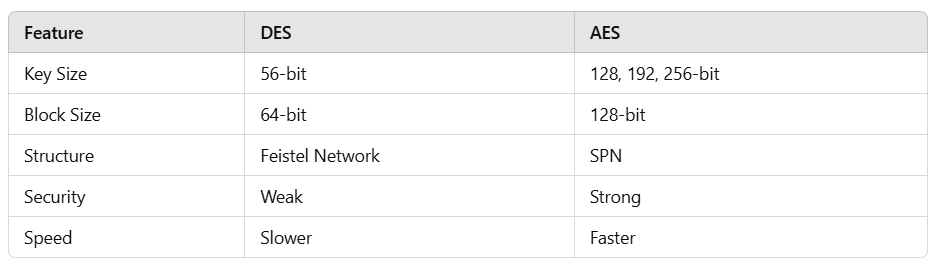

✅ Task 1 1 (Short Answer):
1️⃣ Why is DES considered weak?
2️⃣ Where is AES commonly used?

# Step 1: Implementing DES (10 min)

In [4]:
! pip install pycryptodome


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Following code imports the library for performing enecryption and decryption.

We will use the following library:
https://pycryptodome.readthedocs.io/en/latest/



In [6]:
from Crypto.Cipher import DES
import base64


In [7]:
# Function to pad text to be multiple of 8 bytes
def pad(text, block_size):
    while len(text) % block_size != 0:
        text +=  ' '  # Padding with spaces
    return text


# The function encrypts a given plaintext using DES (Data Encryption Standard) in ECB mode. It first pads the plaintext to a multiple of 8 bytes, encrypts it using the provided key, and returns the Base64-encoded ciphertext.

In [9]:
# DES Encryption
def des_encrypt(plain_text, key):
    cipher = DES.new(key, DES.MODE_ECB)  # ECB mode
    plain_text_padded_text = pad(plain_text, DES.block_size)        # plain_text_pad the plain text to make its length a multiple of 8 bytes
    encrypted_text = cipher.encrypt(plain_text_padded_text.encode())  # Encrypt the plain_text_padded text
    return base64.b64encode(encrypted_text).decode()  # Return the encrypted text encoded in base64


# This code defines a function des_encrypt that encrypts a given plaintext using the DES decryption algorithm in ECB mode, padding the plaintext to match the block size before encryption.



In [11]:
# DES Decryption
def des_decrypt(encrypted_text, key):
    cipher = DES.new(key, DES.MODE_ECB)  # Create cipher with the same key and mode
    decrypted_text = cipher.decrypt(base64.b64decode(encrypted_text)).decode().strip()  # Decrypt and strip plain_text_padding
    return decrypted_text


In [12]:
# Testing DES
# Example usage:
key = b'SecretKe'  # DES key must be exactly 8 bytes long
plain_text = "HelloCrypto"
encrypted = des_encrypt(plain_text, key)
print("Encrypted text:", encrypted)
decrypted = des_decrypt(encrypted, key)
print("Decrypted text:", decrypted)

Encrypted text: HQqgsqSEljgBPH7L4con0w==
Decrypted text: HelloCrypto


✅ Task 2:  Modify the above code to accept user input for plaintext and key.

Hint - use input()

In [14]:
key = b'SecretKe'  # DES key must be exactly 8 bytes long
plain_text = input("Enter a plain text you want to encrypt and decrypt:")
encrypted = des_encrypt(plain_text, key)
print("Encrypted text:", encrypted)
decrypted = des_decrypt(encrypted, key)
print("Decrypted text:", decrypted)

Enter a plain text you want to encrypt and decrypt: This is a secret message for encryption


Encrypted text: 8aiYBbDAIpHNofDecCe9kmb7G4zoGLpM3FcIDpndDTRAgHM5RqYFkw==
Decrypted text: This is a secret message for encryption


Following  code imports the necessary modules to perform AES encryption and decryption, including padding and unpadding functions, as well as base64 encoding/decoding.

In [16]:
from Crypto.Cipher import AES
import base64

Following code defines a function aes_encrypt that encrypts a given plaintext using the AES algorithm in ECB mode (we will learn the ECB mode later), pads the plaintext to match the block size, and then returns the encrypted text encoded in base64.

In [18]:
# AES Encryption
def aes_encrypt(plain_text, key):
    cipher = AES.new(key, AES.MODE_ECB)  # ECB mode
    print (type(plain_text))
    padded_text = pad(plain_text, AES.block_size)  # Pad the plain text to block size
    encrypted_text = cipher.encrypt(padded_text.encode())  # Encrypt the padded text
    return base64.b64encode(encrypted_text).decode()  # Return the encrypted text in base64 format


Following code defines a function aes_decrypt that decrypts a given base64-encoded ciphertext using the AES algorithm in ECB mode, then unpads the decrypted text and returns the plaintext.









In [20]:
# AES Decryption
def aes_decrypt(encrypted_text, key):
    cipher = AES.new(key, AES.MODE_ECB)  # Create the same AES cipher object
    # cipher = AES.new(key.encode(), AES.MODE_ECB)  #update to this to convert input string to byte when you accept user input
    decrypted_text = cipher.decrypt(base64.b64decode(encrypted_text)).decode().strip()  # Decrypt and strip plain_text_padding
    return decrypted_text


In [21]:
# Testing AES
key = b'16bytekeylengthp'  # AES requires 16-byte, 24-byte, or 32-byte key
plain_text = "HelloCrypto"  # The text to encrypt
encrypted_text = aes_encrypt(plain_text, key)  # Encrypt the text
decrypted_text = aes_decrypt(encrypted_text, key)  # Decrypt the text

# Print the results
print(f"AES Encrypted: {encrypted_text}")  # Output the encrypted text
print(f"AES Decrypted: {decrypted_text}")  # Output the decrypted text


<class 'str'>
AES Encrypted: GivAPqcdNy0zbxUWJl3mdw==
AES Decrypted: HelloCrypto


✅ Task 3: Modify the AES code to accept user input for plaintext and key.

✅ Task 4: Change the AES key size to 24 bytes and run the program.

In [34]:
key = input("Enter Key for aes encryption and decryption") #b'16bytekeylengthp'  # AES requires 16-byte, 24-byte, or 32-byte key
plain_text = input("Enter plain text for aes encryption and decryption")  #"HelloCrypto"  # The text to encrypt
encrypted_text = aes_encrypt(plain_text, key.encode())  # Encrypt the text
decrypted_text = aes_decrypt(encrypted_text, key.encode())  # Decrypt the text

# Print the results
print(f"AES Encrypted: {encrypted_text}")  # Output the encrypted text
print(f"AES Decrypted: {decrypted_text}")  # Output the decrypted text

Enter Key for aes encryption and decryption 16bytekeylengthp
Enter plain text for aes encryption and decryption This is a secret message for encryption


<class 'str'>
AES Encrypted: 9iOzgQPdXk6kshEoRUAhuB2WoXkKZ2e3b7cQrvQGF0bnY1H/G0a+YB6ZN51QR5MS
AES Decrypted: This is a secret message for encryption


Following  code measures the time taken to encrypt the plaintext "HelloCrypto" using the DES encryption algorithm by recording the start and end times and then printing the elapsed time.









In [38]:
import time

# Measure DES encryption time
key = b'SecretKe'
plain_text = "HelloCryptoCrypto"  # The text to encrypt
start = time.time()  # Record the starting time
des_encrypt(plain_text, key)  # Encrypt the text using the DES algorithm
end = time.time()  # Record the ending time
print(f"DES Encryption Time: {end - start:.2f} sec")  # Calculate and print the time difference




DES Encryption Time: 0.00 sec


✅ Task 5: In the following cell, write the Python code to measure the time taken by AES encryption *algorithm*

In [41]:
# Measure AES encryption time

key = b'16bytekeylengthp'  # AES requires 16-byte, 24-byte, or 32-byte key
plain_text = "HelloCrypto"  # The text to encrypt
start = time.time()  # Record the starting time
encrypted_text = aes_encrypt(plain_text, key)  # Encrypt the text
end = time.time()  # Record the ending time

# Print the results
print(f"AES Encryption Time: {end - start:.2f} sec")



<class 'str'>
AES Encryption Time: 0.00 sec


Following code encrpts the image using AES algorithm.
The image file is named as 'input.jpg'.

✅ Task 6: Test the code for different types of images and show the original abd cypherimage. Is your encryption method, good or bad?
Save your image as file name - input.jpg or change the code to adjust for any images.




Encrypted image saved as encrypted_ecb.png


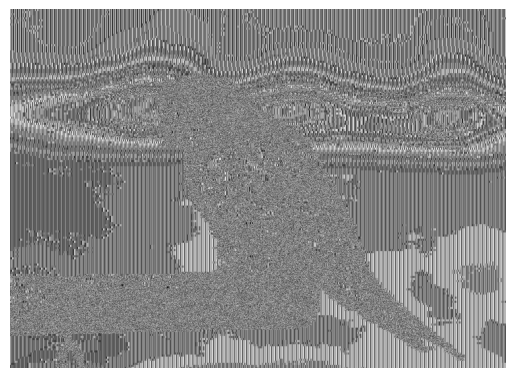

In [44]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt


def load_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img_data = np.array(img)
    return img, img_data

def save_image(image_data, output_path):
    img = Image.fromarray(image_data)
    img.save(output_path)

def encrypt_ecb(image_data, key):
    cipher = AES.new(key, AES.MODE_ECB)
    shape = image_data.shape
    flat_data = image_data.flatten()
    padded_data = pad(flat_data.tobytes(), AES.block_size)
    encrypted_data = cipher.encrypt(padded_data)
    encrypted_array = np.frombuffer(encrypted_data, dtype=np.uint8)[:flat_data.size]
    return encrypted_array.reshape(shape)

def main():
    input_image = 'input.jpg'  # Change to your image file
    output_image = 'encrypted_ecb.png'
    key = os.urandom(16)  # 16-byte AES key

    img, img_data = load_image(input_image)
    encrypted_data = encrypt_ecb(img_data, key)
    save_image(encrypted_data, output_image)
    print(f"Encrypted image saved as {output_image}")

if __name__ == "__main__":
    main()

img = Image.open('encrypted_ecb.png')
plt.imshow(img, cmap='gray') # Displaying as grayscale
plt.axis('off')
plt.show()

**Important: Lab Logbook requirement**
Provide the following in your lab-log book.
1. Sample of plain and cypher text for AES and DES
2. Real image and cipher image for the image of any choice using AES.
3. Explain in one word - 'YES' or 'NO' whether your encryption method for the images is good.

In [48]:
# Import libraries for DES encryption
from Crypto.Cipher import DES
import base64

# Function to pad text to be multiple of 8 bytes
def pad(text, block_size):
    padding_size = block_size - (len(text) % block_size)
    if padding_size == block_size:
        padding_size = 0
    padding = ' ' * padding_size
    return text + padding

# DES Encryption
def des_encrypt(plain_text, key):
    cipher = DES.new(key, DES.MODE_ECB)  # ECB mode
    plain_text_padded = pad(plain_text, DES.block_size)  # Pad the plain text to make its length a multiple of 8 bytes
    encrypted_text = cipher.encrypt(plain_text_padded.encode())  # Encrypt the padded text
    return base64.b64encode(encrypted_text).decode()  # Return the encrypted text encoded in base64

# DES Decryption
def des_decrypt(encrypted_text, key):
    cipher = DES.new(key, DES.MODE_ECB)  # Create cipher with the same key and mode
    decrypted_text = cipher.decrypt(base64.b64decode(encrypted_text)).decode().strip()  # Decrypt and strip padding
    return decrypted_text

In [54]:
# Testing DES with sample plain text
key_des = b'SecretKe'  # DES key must be exactly 8 bytes long
plain_text_des = "This is a secret message for DES encryption."
encrypted_des = des_encrypt(plain_text_des, key_des)
decrypted_des = des_decrypt(encrypted_des, key_des)

print("DES Encryption Sample:")
print("Plain text:", plain_text_des)
print("Cipher text:", encrypted_des)
# print("Decrypted text:", decrypted_des)

DES Encryption Sample:
Plain text: This is a secret message for DES encryption.
Cipher text: 8aiYBbDAIpHNofDecCe9kmb7G4zoGLpMwFNNRkddyi7F6qh/HMwdJSlu7ly2jfMv


In [56]:
# Import libraries for AES encryption
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
from Crypto.Util.Padding import pad, unpad

# AES Encryption (text)
def aes_encrypt(plain_text, key):
    cipher = AES.new(key, AES.MODE_CBC)  # CBC mode with IV
    padded_data = pad(plain_text.encode(), AES.block_size)
    ciphertext = cipher.encrypt(padded_data)
    # Return IV and ciphertext together
    return base64.b64encode(cipher.iv + ciphertext).decode()

# AES Decryption (text)
def aes_decrypt(encrypted_text, key):
    encrypted_data = base64.b64decode(encrypted_text)
    iv = encrypted_data[:AES.block_size]  # First 16 bytes are IV
    ciphertext = encrypted_data[AES.block_size:]  # Rest is ciphertext
    cipher = AES.new(key, AES.MODE_CBC, iv)
    decrypted_data = unpad(cipher.decrypt(ciphertext), AES.block_size)
    return decrypted_data.decode()

In [58]:
# Testing AES with sample plain text
key_aes = get_random_bytes(16)  # AES-128 uses 16-byte key
plain_text_aes = "This is a secret message for AES encryption."
encrypted_aes = aes_encrypt(plain_text_aes, key_aes)
decrypted_aes = aes_decrypt(encrypted_aes, key_aes)

print("AES Encryption Sample:")
print("Plain text:", plain_text_aes)
print("Cipher text:", encrypted_aes)
# print("Decrypted text:", decrypted_aes)
# print("-" * 50)

AES Encryption Sample:
Plain text: This is a secret message for AES encryption.
Cipher text: 9DBebZa+9plXnx7/Jh05vGKuQHFZAtxlaz8Qjsx2d1fomqsKYvme1PIxuiX+VMQTRt6mEjDGI8yEsyMKaqvv1Q==


In [60]:
# Import libraries for image handling
import numpy as np
from PIL import Image
import io
import matplotlib.pyplot as plt

In [62]:
# Function to convert image to bytes
def image_to_bytes(image_path):
    img = Image.open(image_path)
    img_byte_arr = io.BytesIO()
    img.save(img_byte_arr, format=img.format)
    return img_byte_arr.getvalue()

# Function to convert bytes back to image
def bytes_to_image(image_bytes):
    return Image.open(io.BytesIO(image_bytes))

In [64]:
# AES Image Encryption
def aes_encrypt_image(image_path, key):
    # Read image and convert to bytes
    image_bytes = image_to_bytes(image_path)
    
    # Create cipher and encrypt
    cipher = AES.new(key, AES.MODE_CBC)
    padded_data = pad(image_bytes, AES.block_size)
    encrypted_bytes = cipher.encrypt(padded_data)
    
    # Return IV and encrypted data
    return cipher.iv, encrypted_bytes

# AES Image Decryption
def aes_decrypt_image(iv, encrypted_bytes, key):
    # Create cipher for decryption
    cipher = AES.new(key, AES.MODE_CBC, iv)
    
    # Decrypt and unpad
    decrypted_padded = cipher.decrypt(encrypted_bytes)
    try:
        decrypted_bytes = unpad(decrypted_padded, AES.block_size)
        return decrypted_bytes
    except Exception as e:
        print(f"Error during decryption: {e}")
        return None

In [72]:
# Function to display images
def display_images(original_image_path, encrypted_bytes, decrypted_bytes):
    # Original image
    original_img = Image.open(original_image_path)
    
    # For encrypted image, we'll show a representation of encrypted bytes
    # Convert to numpy array and reshape to appear like an image
    encrypted_array = np.frombuffer(encrypted_bytes, dtype=np.uint8)
    encrypted_size = int(np.sqrt(len(encrypted_array)))
    if encrypted_size**2 > len(encrypted_array):
        encrypted_size -= 1
    encrypted_display = encrypted_array[:encrypted_size**2].reshape(encrypted_size, encrypted_size)
    
    # For decrypted image
    try:
        decrypted_img = Image.open(io.BytesIO(decrypted_bytes))
    except Exception as e:
        print(f"Cannot display decrypted image: {e}")
        decrypted_img = None
    
    # Display images
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_img)
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title("Encrypted Image (Representation)")
    plt.imshow(encrypted_display, cmap='gray')
    plt.axis('off')
    
    # plt.subplot(1, 3, 3)
    # plt.title("Decrypted Image")
    # if decrypted_img:
    #     plt.imshow(decrypted_img)
    # else:
    #     plt.text(0.5, 0.5, "Decryption failed", ha='center', va='center')
    # plt.axis('off')
    
    plt.tight_layout()
    plt.show()

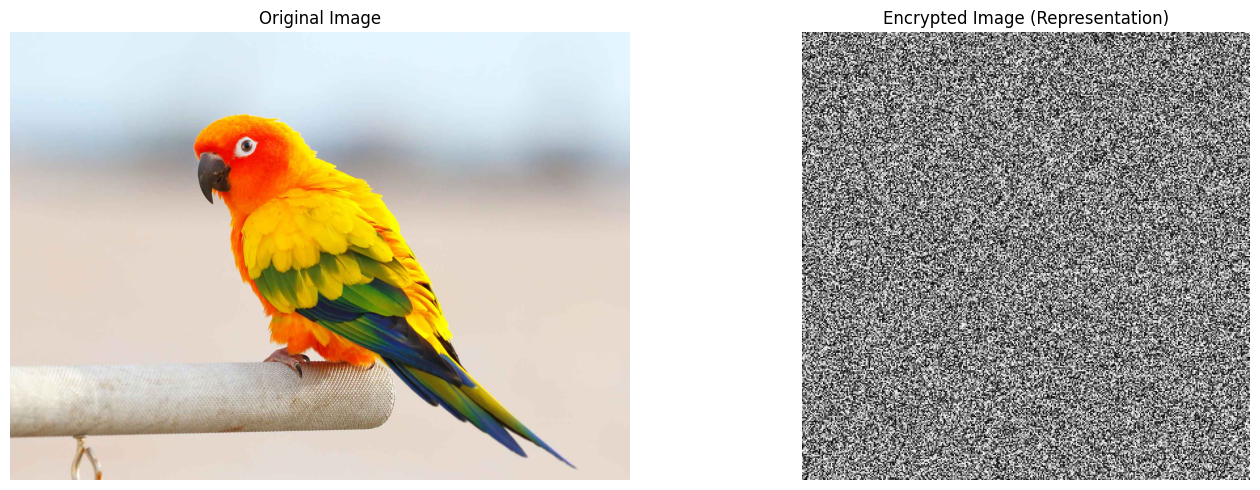

In [74]:
# Example image path - REPLACE THIS WITH YOUR OWN IMAGE PATH
image_path = "input.jpg"  # Replace with your actual image path

# Generate key for AES image encryption
image_key = get_random_bytes(16)  # AES-128

# Encrypt and decrypt image
try:
    # Encrypt the image
    iv, encrypted_image = aes_encrypt_image(image_path, image_key)
    
    # Decrypt the image
    decrypted_image = aes_decrypt_image(iv, encrypted_image, image_key)
    
    # Display the images
    display_images(image_path, encrypted_image, decrypted_image)
    
except Exception as e:
    print(f"Error in image encryption example: {e}")

In [76]:
# Evaluation of AES Image Encryption
print("Evaluation of AES Image Encryption:")
print("Is this encryption method good for images? NO")
print("Explanation: Using AES in CBC mode directly for image encryption is not ideal because:")
print("1. It doesn't preserve the image dimensions")
print("2. A single bit error affects an entire block and subsequent blocks")
print("3. For better image encryption, specific image encryption algorithms should be used")
print("4. Better approaches include format-preserving encryption or encrypting metadata separately")

Evaluation of AES Image Encryption:
Is this encryption method good for images? NO
Explanation: Using AES in CBC mode directly for image encryption is not ideal because:
1. It doesn't preserve the image dimensions
2. A single bit error affects an entire block and subsequent blocks
3. For better image encryption, specific image encryption algorithms should be used
4. Better approaches include format-preserving encryption or encrypting metadata separately
